# Projet 10
### Sommaire:

**Préparation:**
- <a href="#C1">Importation et aperçue des données</a>
- <a href="#C2">Remplacement des données manquantes</a>

**Méthode de prédiction:**
- <a href="#C3">Préparation pour l'entrainement</a>
- <a href="#C4">Régression logistique</a>
- <a href="#C5">Kmeans</a>
- <a href="#C6">adaboost</a>

**Prédiction sur un fichier:**
- <a href="#C7">Prédiction</a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pour la régression linéaire, l'anova, etc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

#pour la régression logistique, préparation du jeu d'entrainement, kmeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans

#sauvegarde du modele pour ouverture sur streamlit
import pickle

## <a name="C1">Importation et aperçue des données</a>

In [45]:
billets = pd.read_csv(r'C:\Users\jorda\Desktop\P10\billets.csv', sep=';')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [46]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


il y a des manquants sur la variable margin_low, on va les regarder

In [4]:
billets.loc[billets['margin_low'].isnull(),:]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


Je vais regarder un peu la différence entre vrais et faux billets

In [48]:
billets[billets["is_genuine"] == True].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [49]:
billets[billets["is_genuine"] == False].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


On affiche une combinaison de scatterplot et d'histogramme sur seaborn pour chaque combinaisons de variables.

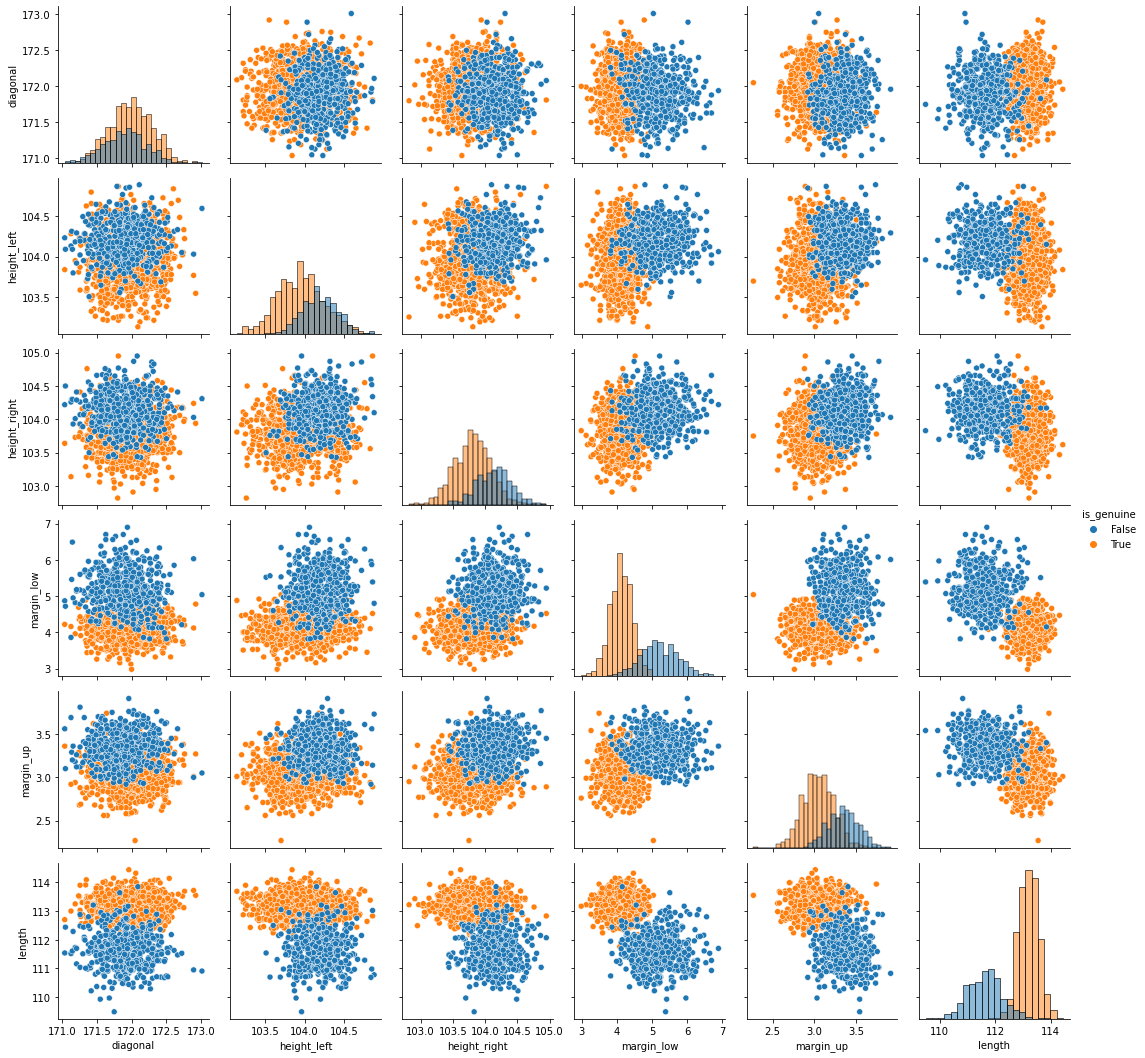

In [50]:
g = sns.PairGrid(billets, hue="is_genuine")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

La variable length et dans une moindre mesure la variable margin low on l'air d'être très intéressante pour séparer les faux des vrais billets. On pourrait faire une version allégée du modèle avec juste ces deux variables.

## <a name="C2">Remplacement des données manquantes</a>

Je commence par mettre de coté les billets avec données incomplètes

In [51]:
billets_sans_na = billets.dropna()
billets_sans_na

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


Avec les données complètes, je fais une régression linéaire

In [52]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=billets_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          2.60e-202
Time:                        15:20:57   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Le r² et r² ajusté sont de même niveau à 0.47 la p-value de chaque variable utilisé est très faible, je conserve le résultat tel quel.
On procède maintenant au calcul des manquants.

In [53]:
manquant = billets.loc[billets['margin_low'].isnull(),:]
for index in manquant.index:
    resultat = reg_multi.predict(manquant.loc[[index],
                                        ["diagonal", "height_left","height_right","margin_up","length"]])
    manquant.loc[index, 'margin_low'] = resultat.values
manquant

C:\Users\jorda\anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36
251,True,171.80,103.26,102.82,3.803308,2.95,113.22
284,True,171.92,103.83,103.76,4.179736,3.23,113.29
334,True,171.85,103.70,103.96,4.127442,3.00,113.36
410,True,172.56,103.72,103.51,4.135034,3.12,112.95
413,True,172.30,103.66,103.50,4.160539,3.16,112.95


In [54]:
billets["catégorie"] = "vrais valeurs"

On insère les manquants

In [55]:
for index in manquant.index:
    billets.loc[index, 'margin_low'] = manquant.loc[index, 'margin_low']
    billets.loc[index, 'catégorie'] = "valeurs calculés"
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
 7   catégorie     1500 non-null   object 
dtypes: bool(1), float64(6), object(1)
memory usage: 83.6+ KB


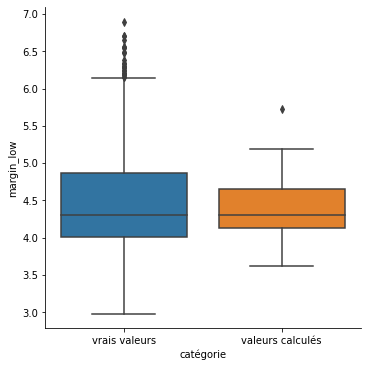

In [56]:
sns.catplot(y="margin_low",x="catégorie", kind="box", data=billets)

Dans le boxplot précédent on voit que les données calculées sont cohérentes par rapport aux données originales, la médiane est identique.

In [57]:
anova_categorie = smf.ols('margin_low~catégorie', data=billets).fit()
print(anova_categorie.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8463
Date:                Sat, 20 Aug 2022   Prob (F-statistic):              0.358
Time:                        15:24:27   Log-Likelihood:                -1503.4
No. Observations:                1500   AIC:                             3011.
Df Residuals:                    1498   BIC:                             3021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [58]:
sm.stats.anova_lm(anova_categorie, typ=2)

,sum_sq,df,F,PR(>F)
catégorie,0.368288,1.0,0.846331,0.35774
Residual,651.867647,1498.0,NaN,NaN


On trouve ici une p-valeur de 0.36, ce qui est au-dessus de 5 %
On ne rejette donc pas l'hypothèse H0 selon laquelle $α_{1}=α_{2}=0$.
Nos données, calculées par régression linéaires, sont donc cohérentes par rapport aux données réelles.

## <a name="C3">Préparation des données d'entraînements</a>

In [59]:
#jeu d'entrainement normal
xtrain, xtest, ytrain, ytest = train_test_split(billets[["diagonal",
                                                         "height_left",
                                                         "height_right",
                                                         "margin_low",
                                                         "margin_up",
                                                         "length"]], billets["is_genuine"], train_size=0.7)


## <a name="C4">Régression logistique</a>

### 1er essai avec jeu de données ordinaires

In [17]:
LRG = linear_model.LogisticRegression(random_state = 0).fit(xtrain, ytrain)
LRG.score(xtrain, ytrain)

0.9876190476190476

Sur les données d'entraînements, on a 98.76% d'individus correctement classés

In [60]:
LRG.score(xtest, ytest)

0.9888888888888889

Sur les données de test, on a 98.99% d'individus correctement classés

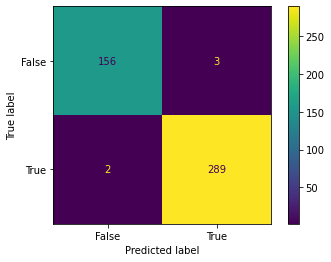

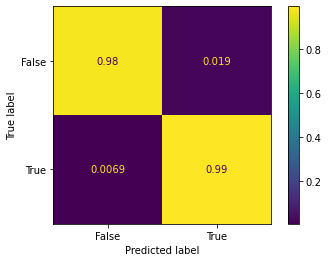

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LRG, xtest, ytest)
ConfusionMatrixDisplay.from_estimator(LRG, xtest, ytest, normalize='true')

Le classement des faux billets est moins bon

### 2eme essai avec les deux variables les plus importantes

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(billets[["margin_low","length"]], billets["is_genuine"], train_size=0.7)

In [63]:
LRG = linear_model.LogisticRegression(random_state = 0).fit(xtrain, ytrain)
LRG.score(xtrain, ytrain)

0.9866666666666667

In [64]:
LRG.score(xtest, ytest)

0.98

Ce qui est intéressant est que le modèle reste très fiable avec moins de données utilisés

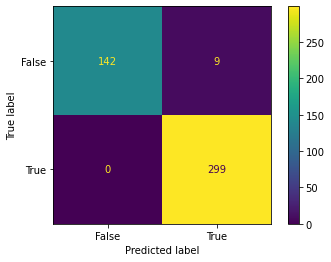

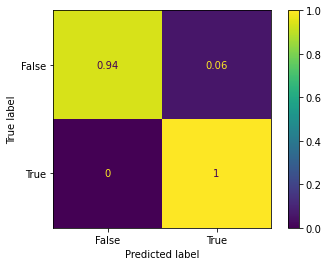

In [65]:
ConfusionMatrixDisplay.from_estimator(LRG, xtest, ytest)
ConfusionMatrixDisplay.from_estimator(LRG, xtest, ytest, normalize='true')

La version allégée a de bonnes performances, mais inférieur à la version complète, notamment sur les faux billets, dans une mise en production d'un algorithme plus lourd cette méthode serait intéressante.

### 3eme essai avec un jeu de données de taille égale entre les faux et vrais billets, avec toutes les variables

In [66]:
df_trainingset = billets

mini = len(billets[billets["is_genuine"] == False])
maxi = len(billets[billets["is_genuine"] == True])

indexes = billets[billets["is_genuine"] == True].index
indexes = np.random.choice(indexes, (maxi-mini), replace = False)
df_trainingset.drop(indexes,inplace=True)
df_trainingset


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,catégorie
0,True,171.81,104.86,104.95,4.52,2.89,112.83,vrais valeurs
1,True,171.46,103.36,103.66,3.77,2.99,113.09,vrais valeurs
2,True,172.69,104.48,103.50,4.40,2.94,113.16,vrais valeurs
4,True,171.73,104.28,103.46,4.04,3.48,112.54,vrais valeurs
5,True,172.17,103.74,104.08,4.42,2.95,112.81,vrais valeurs
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,vrais valeurs
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,vrais valeurs
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,vrais valeurs
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,vrais valeurs


In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(billets[["diagonal","height_left","height_right","margin_low","margin_up","length"]], billets["is_genuine"], train_size=0.7)

In [68]:
LRG = linear_model.LogisticRegression(random_state = 0).fit(xtrain, ytrain)
LRG.score(xtrain, ytrain)

0.9871428571428571

In [69]:
LRG.score(xtest, ytest)

0.99

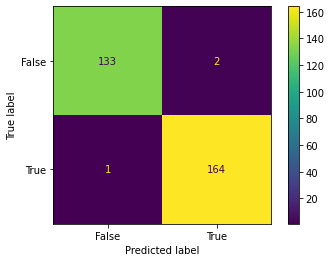

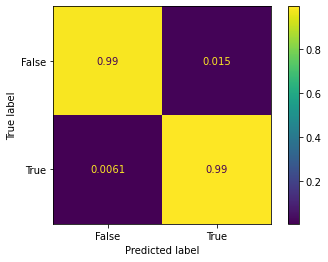

In [70]:
ConfusionMatrixDisplay.from_estimator(LRG, xtest, ytest)
ConfusionMatrixDisplay.from_estimator(LRG, xtest, ytest, normalize='true')

Le modèle est très bon à la fois sur les faux et vrais billets on va le sauvegarder

### sauvegarde du modèle

In [72]:
nom_fichier = 'model_final.sav'
pickle.dump(LRG, open(nom_fichier, 'wb'))
#pour utilisation sur streamlit

On teste aussi d'autres paramètres, mais au final, on retombe sur les réglages par défaut.

In [73]:
from sklearn.model_selection import GridSearchCV,cross_val_score

logistic = linear_model.LogisticRegression()

solvers = ['liblinear',"lbfgs","none"]

epochs = [10,25,50,100,200]

params = {"max_iter":epochs,"solver":solvers}

grid_model = GridSearchCV(logistic,param_grid=params)

grid_model.fit(xtrain,ytrain)

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
S

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jorda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jorda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jorda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 48, in _check_solver
    raise ValueError(
Value

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [10, 25, 50, 100, 200],
                         'solver': ['liblinear', 'lbfgs', 'none']})

In [74]:
grid_model.best_params_

{'max_iter': 25, 'solver': 'liblinear'}

In [75]:
grid_model.best_score_

0.9871428571428572

## <a name="C5">Kmeans</a>

In [82]:
km = KMeans(n_clusters=2)
km.fit(xtrain)
clusters = km.labels_
df_kmeans = pd.DataFrame(ytrain)
df_kmeans.reset_index(drop=True, inplace=True)
df_kmeans['prédit'] = pd.Series(clusters)
df_kmeans["donnée"] = "entrainement"
df_kmeans

,is_genuine,prédit,donnée
0,False,0,entrainement
1,False,0,entrainement
2,True,1,entrainement
3,True,1,entrainement
4,True,1,entrainement
...,...,...,...
695,True,1,entrainement
696,False,0,entrainement
697,False,0,entrainement
698,False,0,entrainement


Affichage des centroides

In [83]:
centroids = km.cluster_centers_
centroids

array([[171.90432749, 104.18467836, 104.13201754,   5.28499824,
          3.33950292, 111.57964912],
       [171.98888268, 103.96477654, 103.82868715,   4.14139988,
          3.07402235, 113.13905028]])

calcul des clusters pour les données test

In [84]:
clusters_KMeans = km.predict(xtest)
df_test = pd.DataFrame(ytest)
df_test.reset_index(drop=True, inplace=True)
df_test['prédit'] = pd.Series(clusters_KMeans)
df_test["donnée"] = "test"
df_test

,is_genuine,prédit,donnée
0,True,1,test
1,False,0,test
2,False,0,test
3,True,1,test
4,False,0,test
...,...,...,...
295,True,1,test
296,False,0,test
297,False,0,test
298,True,1,test


je regroupe les résultats sur les données d'entraînements et de test en un seul dataframe

In [85]:
df_kmeans_analyse = pd.concat([df_kmeans, df_test], axis=0)
df_kmeans_analyse.reset_index(drop=True, inplace=True)
df_kmeans_analyse

,is_genuine,prédit,donnée
0,False,0,entrainement
1,False,0,entrainement
2,True,1,entrainement
3,True,1,entrainement
4,True,1,entrainement
...,...,...,...
995,True,1,test
996,False,0,test
997,False,0,test
998,True,1,test


on remplace les numéros de clusters par un booléen pour avoir la même chose entre la valeur prédite et la valeur souhaitée

In [86]:
df_kmeans_analyse['prédit'] = df_kmeans_analyse['prédit'].replace([1,0],[True,False])
df_kmeans_analyse

,is_genuine,prédit,donnée
0,False,False,entrainement
1,False,False,entrainement
2,True,True,entrainement
3,True,True,entrainement
4,True,True,entrainement
...,...,...,...
995,True,True,test
996,False,False,test
997,False,False,test
998,True,True,test


In [87]:
df_kmeans_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   is_genuine  1000 non-null   bool  
 1   prédit      1000 non-null   bool  
 2   donnée      1000 non-null   object
dtypes: bool(2), object(1)
memory usage: 9.9+ KB


on va faire la matrice de confusion 

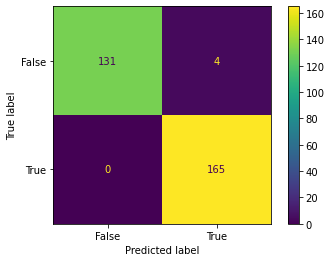

In [89]:
from sklearn.metrics import confusion_matrix

test_réel = df_kmeans_analyse['is_genuine'][df_kmeans_analyse['donnée'] == "test"].to_numpy()
test_prédit = df_kmeans_analyse['prédit'][df_kmeans_analyse['donnée'] == "test"].to_numpy()

confusion_matrix = confusion_matrix(test_réel, test_prédit)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()



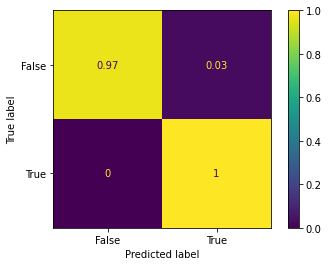

In [90]:
c = confusion_matrix
normed_c = (c.T / c.astype(float).sum(axis=1)).T
cm_display = ConfusionMatrixDisplay(confusion_matrix = normed_c, display_labels = [False, True])
cm_display.plot()

In [91]:
print("performance modèle sur donnée de test", 1-sum(test_prédit.astype(int) - test_réel.astype(int))/300)

performance modèle sur donnée de test 0.9866666666666667


Le résultat est un peu moins bon que celui obtenue par le modèle de régression logistique avec 98.67% de réussite, le résultat est surtout moins bon pour la détection des faux billets.

## <a name="C6">AdaBoost</a>

Adaboost n'est pas demandé dans le projet, mais j'ai voulu le tester pour faire une comparaison avec la régression logistique. Il ne sera pas utilisé dans la mise en production.

In [98]:
from sklearn.ensemble import AdaBoostClassifier

clf_adc = AdaBoostClassifier(n_estimators=200).fit(xtrain, ytrain)
clf_adc.score(xtrain, ytrain)

1.0

In [100]:
clf_adc.score(xtest, ytest)

0.9966666666666667

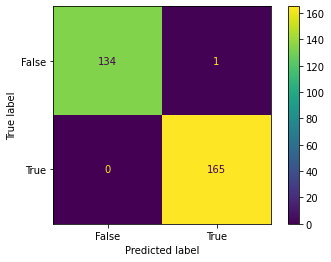

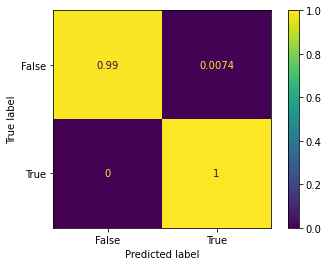

In [101]:
ConfusionMatrixDisplay.from_estimator(clf_adc, xtest, ytest)
ConfusionMatrixDisplay.from_estimator(clf_adc, xtest, ytest, normalize='true')

Le résultat obtenu est meilleur que celui de la régression logistique.

## <a name="C7">Prédiciton sur fichier</a>

Chargement d'un fichier à tester

In [102]:
production = pd.read_csv(r'C:\Users\jorda\Desktop\P10\billets_production.csv', sep=',')
production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5
5,171.81,104.86,104.95,4.52,2.89,112.83,v_6
6,171.46,103.36,103.66,3.77,2.99,113.09,v_7
7,172.69,104.48,103.50,4.40,2.94,113.16,v_8
8,171.36,103.91,103.94,3.62,3.01,113.51,v_9
9,172.05,104.20,104.11,4.09,3.37,111.18,f1


Calcul avec AdaBoost

In [108]:
resultat = clf_adc.predict(production[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
resultat

array([False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False])

In [109]:
df_res = production
df_res['vrais/faux billet'] = resultat.tolist()
df_res

,diagonal,height_left,height_right,margin_low,margin_up,length,id,vrais/faux billet
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True
5,171.81,104.86,104.95,4.52,2.89,112.83,v_6,True
6,171.46,103.36,103.66,3.77,2.99,113.09,v_7,True
7,172.69,104.48,103.50,4.40,2.94,113.16,v_8,True
8,171.36,103.91,103.94,3.62,3.01,113.51,v_9,True
9,172.05,104.20,104.11,4.09,3.37,111.18,f1,False


On rouvre le fichier pickle stockant le modèle de régression logistique et on lance la classification.

In [110]:
nom_fichier = 'model_final.sav'
loaded_model = pickle.load(open(nom_fichier, 'rb'))
resultat = loaded_model.predict(production[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
df_res = production
df_res['vrais/faux billet'] = resultat.tolist()
df_res

,diagonal,height_left,height_right,margin_low,margin_up,length,id,vrais/faux billet
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True
5,171.81,104.86,104.95,4.52,2.89,112.83,v_6,False
6,171.46,103.36,103.66,3.77,2.99,113.09,v_7,True
7,172.69,104.48,103.50,4.40,2.94,113.16,v_8,True
8,171.36,103.91,103.94,3.62,3.01,113.51,v_9,True
9,172.05,104.20,104.11,4.09,3.37,111.18,f1,False
